## Maximizing f1, f2, f3
Using Pareto Optimal Solution with Weighted Sum Method
> We have given equal weight to each function

In [434]:
import math, random, string
import numpy as np
import matplotlib.pyplot as plt
import copy, time

In [435]:
population_size = 50   # N = 50, 100, 200
crossover_prob = 0.3  # 0.2, 0.3
mutation_prob = 0.05  # 0.01, 0.05
# mutation_prob = 0.5
TOT_ITER = 100     # 10, 20, 50, 100, 200, 500 

In [436]:
def getFloat(s) :
    s1, s2 = s.split(".")
    s1 = int(s1, 2)
    s2 = int(s2, 2)/(2**len(s2))
    return s1 + s2

def binaryToReal(sList) :
    xList = []
    for s in sList :
        x = getFloat(s)
        xList.append(x)
    return xList

def f1(sList) :
    xList = binaryToReal(sList)
    return sum([x**2 for x in xList])

def f2(sList) :
    xList = binaryToReal(sList)
    return sum([int(x) for x in xList])

def f3(sList) :
    xList = binaryToReal(sList)
    return sum([(i+1)*(x**4) for i, x in enumerate(xList)]) + np.random.normal()

def getRandomString(N) :
    s = ""
    for i in range(N) :
        s += str(np.random.randint(2))
    return s

In [437]:
def getValidNumber() :
    s1 = getRandomString(2)
    while(int(s1, 2) == 3) :
        s1 = getRandomString(2)
    s2 = getRandomString(7)
    if(int(s1, 2) == 2) :
        while(int(s2, 2) > 4) :
            s2 = getRandomString(7)
    else :
        while(int(s2, 2) >= 100) :
            s2 = getRandomString(7)
    return s1 + "." + s2

def getVal(x) :
    return f1(x) + f2(x) + f3(x)

def getValue(parentList) :
    max_parent = None
    max_val = -1e10
    for parent in parentList :
        val = getVal(parent)
        if(val > max_val) :
            max_val = val
            max_parent = parent
    return max_parent, max_val

In [438]:
# selection
def selection(offsprings) :
    best = None
    best2 = None
    max_val = -1e8
    max_val2 = -1e8
    for offspring in offsprings :
        val = f1(offspring) + f2(offspring) + f3(offspring)
        if(val > max_val) :
            max_val = val
            best = offspring
        elif(val > max_val2) :
            max_val2 = val
            best2 = offspring

    if(best2 == None) : best2 = best
    return best, best2

# single point crossover
def crossover(sList1, sList2) :
    newList1 = []
    newList2 = []
    for s1, s2 in zip(sList1, sList2) :
        temp_s1 = s1
        temp_s2 = s2
        if(s1[0] == '-') :
            s1 = s1[1:]
        if(s2[0] == '-') :
            s2 = s2[1:]
        s1 = s1.replace('.', '')
        s2 = s2.replace('.', '')

        l1 = np.random.randint(min(len(s1), len(s2)))
        offspring1 = s1[:l1] + s2[l1:]
        offspring2 = s2[:l1] + s1[l1:]
        offspring1 = offspring1[:2] + "." + offspring1[2:]
        offspring2 = offspring2[:2] + "." + offspring2[2:]
        offspring1 = "-" * (np.random.rand() < 0.5) + offspring1
        offspring2 = "-" * (np.random.rand() < 0.5) + offspring2
        if(getFloat(offspring1) > 2.04 or getFloat(offspring1) < -2.04) :
            offspring1 = temp_s1
            
        if(getFloat(offspring2) > 2.04 or getFloat(offspring2) < -2.04) :
            offspring2 = temp_s2
        
        newList1.append(offspring1)
        newList2.append(offspring2)
        
    return newList1, newList2

# mutation
def mutation(sList) :
    newList = []
    for s in sList :
        temp_s = s
        if(s[0] == '-') :
            s = s[1:]
        s = s.replace('.', '')

        rand_index = np.random.randint(len(s))
        temp = list(s)
        # sList[rand_index1], sList[rand_index2] = sList[rand_index2], sList[rand_index1]
        if(temp[rand_index] == '1'):
            temp[rand_index] = '0'
        else :
            temp[rand_index] = '1'
        s = ''.join(temp)
        s = s[:2] + "." + s[2:]
        s = "-" * (np.random.rand() < 0.5) + s
        if(getFloat(s) > 2.04 or getFloat(s) < -2.04) :
            s = temp_s
        newList.append(s)
    return newList

def v(s1, s2, diversity = False, parentList = None) :
    np.random.seed(np.random.randint(int(time.time())))
    if(np.random.rand() <= crossover_prob) :
        s1, s2 = crossover(s1, s2)

    populations = []
    if(diversity and parentList is not None) :
        fitnessList = [getVal(x) for x in parentList]
        f_max = np.mean(fitnessList)
        ASD = np.std(fitnessList)            # Average Square Deviation
#         print("f_max = ", f_max)
#         print("ASD = ", ASD)
        prob_m = mutation_prob * (1 + ((f_max - ASD)/ (f_max + ASD)))
    else :
        prob_m = mutation_prob
        
    # poolsize = 100
    for i in range(100) :
        np.random.seed(np.random.randint(int(time.time())))
        if(np.random.rand() <= prob_m) :
            populations.append(mutation(s1))
        else :
            populations.append(s1)
        np.random.seed(np.random.randint(int(time.time())))
        if(np.random.rand() <= prob_m) :
            populations.append(mutation(s2))
        else :
            populations.append(s2)

    return selection(populations)

# Random Search 

=========== Random search =========
Optimal X :  [2.015625, 2.0234375, 2.015625, -1.984375, 2.03125]
Best Value :  275.2028306621863


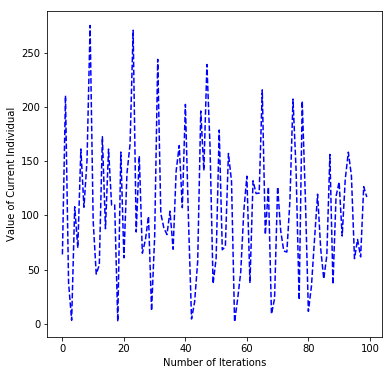

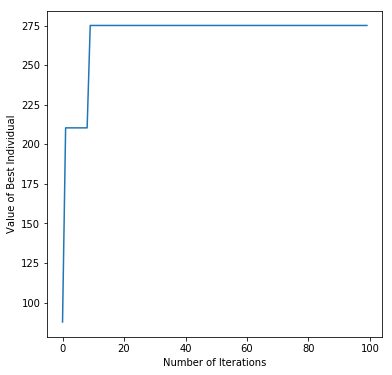

In [439]:
iter = 0
x = ["-"*(np.random.rand() > 0.5) + getValidNumber() for _ in range(5)]
best = x
bestVal = getVal(x)

currList = []
bestList = []
while(iter < TOT_ITER) :
    iter += 1
    x = ["-"*(np.random.rand() > 0.5) + getValidNumber() for _ in range(5)]
    currVal = getVal(x)
    if(currVal > bestVal) :
        bestVal = currVal
        best = x
    currList.append(currVal)
    bestList.append(bestVal)
        
print("=========== Random search =========")
print("Optimal X : ", binaryToReal(best))
print("Best Value : ", bestVal)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, xlabel = "Number of Iterations", ylabel = "Value of Current Individual")
ax.plot(currList, 'b--')

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, xlabel = "Number of Iterations", ylabel = "Value of Best Individual")
ax.plot(bestList)
plt.show()

# Basic Genetic Algorithm

iter  10
iter  20
iter  30
iter  40
iter  50
iter  60
iter  70
iter  80
iter  90
iter  100
========= Basic Genetic Algorithm ========
bestVal :  292.142281534292
Optimal x :  [2.0234375, 2.0234375, 2.0390625, 2.0390625, 2.0390625]


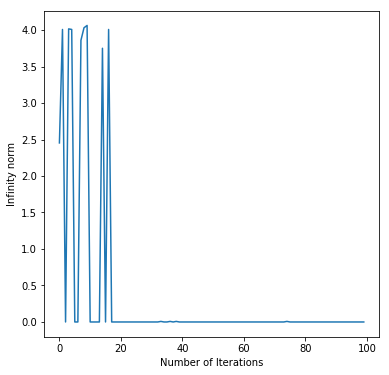

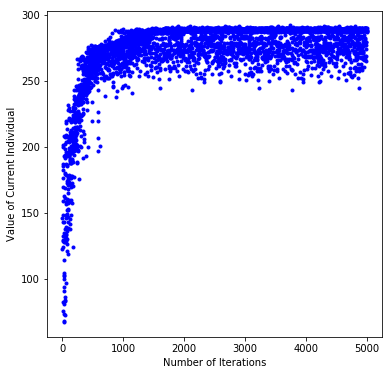

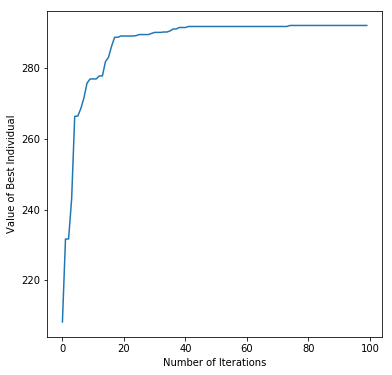

In [440]:
parentList = [["-"*(np.random.rand() > 0.5) + getValidNumber() for _ in range(5)] for _ in range(population_size)]
# parent1 = ["-"*(np.random.rand() > 0.5) + getValidNumber() for _ in range(5)]
# parent2 = ["-"*(np.random.rand() > 0.5) + getValidNumber() for _ in range(5)]
iter = 0
best, bestVal = getValue(parentList)
out = []
currList = []
bestList = []
while(iter < TOT_ITER) :
    iter+=1
    newParentList = []
    prevBest = copy.deepcopy(best)
    for i in range(population_size) :
        parent1 = parentList[np.random.randint(population_size)]
        parent2 = parentList[np.random.randint(population_size)]
        parent1, parent2 = v(parent1, parent2)
        curr, currVal = getValue([parent1, parent2])
        currList.append(copy.copy(currVal))
        newParentList.append(copy.copy(curr))
        if(currVal > bestVal) :
            bestVal = currVal
            best = copy.copy(curr)
    if(iter % 10 == 0) :
        print("iter ", iter)
        
    prevBest_float = [getFloat(x) for x in prevBest]
    best_float = [getFloat(x) for x in best]
    diff = np.array(list(map(float, best_float))) - np.array(list(map(float, prevBest_float)))
    bestList.append(bestVal)
    out.append(np.linalg.norm(diff, np.inf))
    
    parentList = copy.deepcopy(newParentList)
        
print("========= Basic Genetic Algorithm ========")
print("bestVal : ", bestVal)
print("Optimal x : ", binaryToReal(best))

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, xlabel = "Number of Iterations", ylabel = "Infinity norm")
ax.plot(out)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, xlabel = "Number of Iterations", ylabel = "Value of Current Individual")
ax.plot(currList, 'b.')

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, xlabel = "Number of Iterations", ylabel = "Value of Best Individual")
ax.plot(bestList)
plt.show()

# Genetic Algorithm with elitism

iter  10
iter  20
iter  30
iter  40
iter  50
iter  60
iter  70
iter  80
iter  90
iter  100
========= Genetic Algorithm With Elitism ========
bestVal :  292.15315383428816
Optimal x :  [2.0390625, 2.015625, 2.0390625, 2.0390625, 2.0390625]


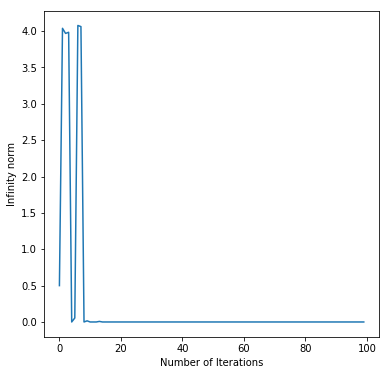

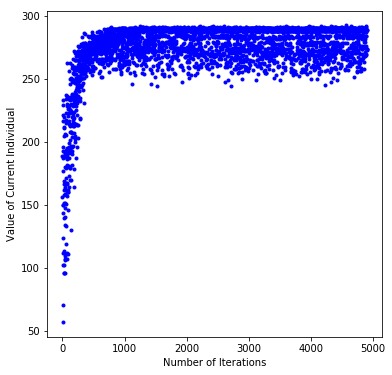

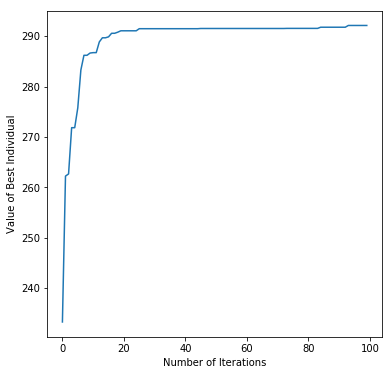

In [441]:
parentList = [["-"*(np.random.rand() > 0.5) + getValidNumber() for _ in range(5)] for _ in range(population_size)]
# parent1 = ["-"*(np.random.rand() > 0.5) + getValidNumber() for _ in range(5)]
# parent2 = ["-"*(np.random.rand() > 0.5) + getValidNumber() for _ in range(5)]
iter = 0
best, bestVal = getValue(parentList)
fig = plt.figure(figsize=(6, 6))
out = []
currList = []
bestList = []
while(iter < TOT_ITER) :
    iter+=1
    newParentList = []
    curr, best_in_population = getValue(parentList)
    if(best_in_population > bestVal) :
        bestVal = best_in_population
        best = copy.copy(curr)
        
    newParentList.append(best)
    prevBest = copy.deepcopy(best)
    
    for i in range(population_size-1) :
        parent1 = parentList[np.random.randint(population_size)]
        parent2 = parentList[np.random.randint(population_size)]
        parent1, parent2 = v(parent1, parent2)
        curr, currVal = getValue([parent1, parent2])
        currList.append(copy.copy(currVal))
        newParentList.append(copy.copy(curr))
        if(currVal > bestVal) :
            bestVal = currVal
            best = copy.copy(curr)
    
    if(iter % 10 == 0) :
        print("iter ", iter)
    prevBest_float = [getFloat(x) for x in prevBest]
    best_float = [getFloat(x) for x in best]
    diff = np.array(list(map(float, best_float))) - np.array(list(map(float, prevBest_float)))
    bestList.append(bestVal)
    out.append(np.linalg.norm(diff, np.inf))
#     out.append(np.linalg.norm(diff, 2))
    parentList = copy.deepcopy(newParentList)
        
print("========= Genetic Algorithm With Elitism ========")
print("bestVal : ", bestVal)
print("Optimal x : ", binaryToReal(best))

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, xlabel = "Number of Iterations", ylabel = "Infinity norm")
ax.plot(out)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, xlabel = "Number of Iterations", ylabel = "Value of Current Individual")
ax.plot(currList, 'b.')

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, xlabel = "Number of Iterations", ylabel = "Value of Best Individual")
ax.plot(bestList)
plt.show()

# Genetic Algorithm with diversity

iter  10
iter  20
iter  30
iter  40
iter  50
iter  60
iter  70
iter  80
iter  90
iter  100
========= Genetic Algorithm with diversity ========
bestVal :  293.22285727202234
Optimal x :  [2.0390625, 2.0390625, 2.0390625, 2.0390625, 2.0390625]


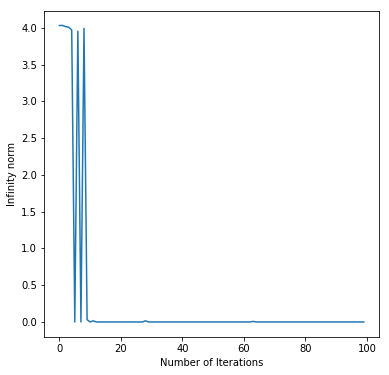

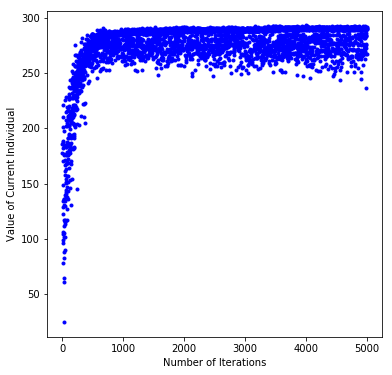

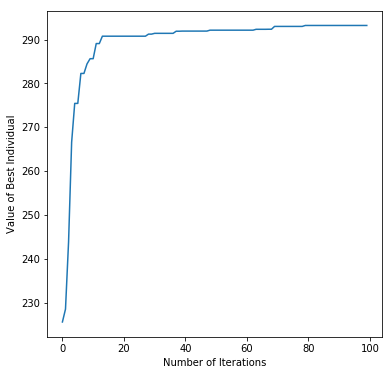

In [442]:
parentList = [["-"*(np.random.rand() > 0.5) + getValidNumber() for _ in range(5)] for _ in range(population_size)]
# parent1 = ["-"*(np.random.rand() > 0.5) + getValidNumber() for _ in range(5)]
# parent2 = ["-"*(np.random.rand() > 0.5) + getValidNumber() for _ in range(5)]
iter = 0
best, bestVal = getValue(parentList)
out = []
bestList = []
currList = []
while(iter < TOT_ITER) :
    iter+=1
    newParentList = []
    prevBest = copy.copy(best)
    for i in range(population_size) :
        parent1 = parentList[np.random.randint(population_size)]
        parent2 = parentList[np.random.randint(population_size)]
        parent1, parent2 = v(parent1, parent2, diversity=True, parentList = parentList)
        curr, currVal = getValue([parent1, parent2])
        newParentList.append(copy.copy(curr))
        currList.append(currVal)
        if(currVal > bestVal) :
            bestVal = currVal
            best = copy.copy(curr)

    if(iter % 10 == 0) :
        print("iter ", iter)
    prevBest_float = [getFloat(x) for x in prevBest]
    best_float = [getFloat(x) for x in best]
    diff = np.array(list(map(float, best_float))) - np.array(list(map(float, prevBest_float)))
    out.append(np.linalg.norm(diff, np.inf))
    bestList.append(bestVal)
    parentList = copy.deepcopy(newParentList)

print("========= Genetic Algorithm with diversity ========")
print("bestVal : ", bestVal)
print("Optimal x : ", binaryToReal(best))

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, xlabel = "Number of Iterations", ylabel = "Infinity norm")
ax.plot(out)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, xlabel = "Number of Iterations", ylabel = "Value of Current Individual")
ax.plot(currList, 'b.')

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, xlabel = "Number of Iterations", ylabel = "Value of Best Individual")
ax.plot(bestList)
plt.show()